<img src="./pics/DO_Logo.PNG" alt="logo" style="width:150px;"/>

<div style="background-color: #3398FF; padding: 10px; border-radius: 5px;">

<div align="center">
    <h1><strong>&#x1F575; AusReddit Aggregate Data Exploration Notebook</strong></h1>
</div> 

This is the Exploration notebook - Start here!

In this notebook you will be able to find ways of getting data about the QUT Digital Observatory's AusReddit collection. For more information on AusReddit go here - https://www.digitalobservatory.net.au/resources/ausreddit/

The purpose of this notebook is to explore the data contained in AusReddit to see if the data you are interested in (e.g. topics, words, etc) are held in the collection.

The notebook/s can access:

+ N-grams for the entire collection - 1-grams and 3-grams
+ Domains/URLs for the entire collection
+ Emotions (NRC) for the entire collection
+ Topic Models (LDA) for the entire collection

&#x1F6D1; Note: you cannot access AusReddit directly from this notebook - you need to contact the Digital Observatory if you want to get any reddit data from the collection.

### Working with Outputs

Most functions in this notebook return **dataframes**. You can display the results by using the `print()` function, or use `.head(n)` and `.tail(n)` to view the top or bottom `n` rows, e.g.:

```python
print(top_ngrams)
top_ngrams.head(10)
top_ngrams.tail(5)
```

### Saving DataFrames

You can save any dataframe to a file using pandas' built-in methods:

```python
top_ngrams.to_csv('output.csv', index=False)    # Save as CSV
top_ngrams.to_excel('output.xlsx', index=False) # Save as Excel
```

### Saving Plots

Plots are typically returned as matplotlib or plotly figure objects. To save a plot to a file, use the appropriate method, for example:

```python
# For matplotlib figures
fig.savefig('output.png')

# For plotly figures
fig.write_image('output.png')
```

You may need to install additional packages for saving plotly images (e.g., `kaleido`).

In [1]:
# This cell initializes the main exploration functionality
# The Exploration class contains methods for:
# - Loading AusReddit data (1-grams, 3-grams, emotions, domains, topics)
# - Analyzing frequencies over time periods
# - Searching for specific keywords, topics and domains
# - Visualizing trends and comparisons

from exploration_notebook import ExplorationAR

explore = ExplorationAR()

---
# Word Frequencies (1-grams)

This section analyzes unigram (single word) frequencies from the AusReddit dataset. We'll explore:

- Most frequent n-grams in specified date ranges
- Keyword searches with frequency counts

The analysis uses the 1-grams dataset containing individual word frequencies from comments.

### About the 1-grams Data

The 1-grams data is **month-binned**: each row represents a single word (unigram), the month it was counted (always the first day of the month), and its frequency for that month. This structure allows you to examine how word usage changes over time, spot trends, or identify spikes in specific terms.

Typical columns include:
- `ngram`: The word itself
- `month`: The first day of the month the word frequency was recorded (e.g., `2008-02-01`)
- `count`: How many times the word appeared in that month

### Interpreting Results

- **Top n-grams**: Shows the most frequent words for a given date range. This can highlight trending topics, common language, or recurring themes.
- **Keyword search**: Finds how often a specific word appears in the dataset over a chosen period.

### Customizing the Analysis

You can change the following parameters in the functions to affect the results:
- **Date Range**: Adjusting the start and end dates will focus the analysis on different periods, revealing short-term events or long-term trends.
- **Number of Results (`top_n`)**: Increasing or decreasing the number of top n-grams returned will show more or fewer frequent words.
- **Keyword**: Searching for different keywords lets you track specific topics or terms of interest.

Changing these parameters can help you:
- Zoom in on specific events or periods
- Compare language before and after a key date
- Explore the popularity of different terms

Experiment with these settings to discover patterns and insights in the AusReddit collection.

In [2]:
onegram_csv_path = explore.get_data(
    "https://data.ldaca.edu.au/api/object/open?id=arcp://name,hdl10.25912~RDF_1754373503052/1grams_crate/&path=1grams_crate%2Fngram_1_counts_202504291145_postgres.csv",
    "ngram_1_counts_202504291145_postgres.csv"
)

one_grams = explore.load_data(onegram_csv_path)

In [3]:
top_ngrams = explore.top_ngrams_in_date_range(one_grams, 20, "2021-01-01", "2021-03-01")

In [4]:
keyword_search = explore.keyword_search_in_date_range(one_grams, "national", "2021-01-01", "2021-03-01")

---
# Trigram Frequencies (3-grams)

This section analyzes trigram (three words) frequencies from the AusReddit dataset. We'll explore:

- Most frequent n-grams in specified date ranges
- Keyword searches with frequency counts

The analysis uses the 3-grams dataset containing three word string frequencies from comments.

### About the 3-grams Data

The 3-grams data is **month-binned**: each row represents a three-word phrase (trigram), the month it was counted (always the first day of the month), and its frequency for that month. This structure allows you to examine how phrase usage changes over time, spot trends, or identify spikes in specific expressions.

Typical columns include:
- `ngram`: The trigram phrase (three words)
- `month`: The first day of the month the trigram frequency was recorded (e.g., `2008-02-01`)
- `count`: How many times the trigram appeared in that month

### Interpreting Results

- **Top n-grams**: Shows the most frequent trigrams for a given date range. This can highlight trending phrases, common expressions, or recurring topics.
- **Keyword search**: Finds how often a specific word or phrase appears within trigrams in the dataset over a chosen period.

### Customizing the Analysis

You can change the following parameters in the functions to affect the results:
- **Date Range**: Adjusting the start and end dates will focus the analysis on different periods, revealing short-term events or long-term trends.
- **Number of Results (`top_n`)**: Increasing or decreasing the number of top trigrams returned will show more or fewer frequent phrases.
- **Keyword**: Searching for different keywords lets you track specific topics or terms of interest within trigrams.

Changing these parameters can help you:
- Zoom in on specific events or periods
- Compare phrase usage before and after a key date
- Explore the popularity of different expressions

Experiment with these settings to discover patterns and insights in the AusReddit collection.

(keyword search will find all instances of the keyword in a trigram)

Note - this is a large dataset

In [5]:
trigram_csv_path = explore.get_data(
    "https://data.ldaca.edu.au/api/object/open?id=arcp://name,hdl10.25912~RDF_1754373503052/3grams_crate/&path=3grams_crate%2Fngram_3_counts_202504291222_postgres.csv",
    "ngram_3_counts_202504291222_postgres.csv"
)

tri_grams = explore.load_data(trigram_csv_path)

In [6]:
top_ngrams_3 = explore.top_ngrams_in_date_range(tri_grams, 20, "2021-01-01", "2021-03-01")

In [7]:
keyword_search_3 = explore.keyword_search_in_date_range(tri_grams, "national", "2021-01-01", "2021-03-01")

---
## Domain Analysis

This section applies the exploration functions to a dataset of domains (URLs).

### About the Domain Data

The domain data is **day-binned**: each row represents a domain (e.g., `www.example.com`), the day it was counted, and its frequency for that day. The domains are the main website addresses, not full URLs or paths—so analysis focuses on the popularity of entire sites rather than specific pages.

Typical columns include:
- `day`: The day the domain frequency was recorded (e.g., `2021-01-01`)
- `domain`: The domain name (e.g., `www.example.com`)
- `count`: How many times the domain appeared in that day

### What Domains Reflect

Domains reflect which external websites are being referenced or linked to in Reddit comments. High-frequency domains may indicate popular news sources, social media platforms, or other sites of interest to the community during specific periods.

### Interpreting Results

- **Top domains**: Shows the most frequently referenced domains for a given date range. This can highlight trending sources, major events, or shifts in community attention.
- **Keyword search**: Finds how often a specific domain or keyword appears in the dataset over a chosen period.

### Customizing the Analysis

You can change the following parameters in the functions to affect the results:
- **Date Range**: Adjusting the start and end dates will focus the analysis on different periods, revealing short-term spikes or long-term trends in domain popularity.
- **Number of Results (`top_n`)**: Increasing or decreasing the number of top domains returned will show more or fewer frequently referenced sites.
- **Keyword**: Searching for different keywords lets you track specific domains or types of sites.

Changing these parameters can help you:
- Zoom in on specific events or periods
- Compare domain popularity before and after a key date
- Explore the influence of different websites

Experiment with these settings to discover patterns and insights in how Reddit users reference external domains.

In [8]:
domain_csv_path = explore.get_data(
    "https://data.ldaca.edu.au/api/object/open?id=arcp://name,hdl10.25912~RDF_1754373503052/domains_crate/&path=domains_crate%2Fdomain_frequency_202504291124.csv",
    "domain_frequency_202504291124.csv"
)

domains = explore.load_data(domain_csv_path)

In [9]:
top_domains = explore.top_domains_in_date_range(domains, 20, "2021-01-01", "2021-03-01")

In [10]:
keyword_search_domains = explore.keyword_search_in_domains(domains, "national", "2021-01-01", "2021-03-01")

---
## Emotion Analysis

This section applies the exploration functions to a dataset of emotions derived from the NRC lexicon.

### About the Emotion Data

The emotion data is **day-binned**: each row represents a single day and contains counts for each emotion category, as well as the total word count. The columns are:

- `date`: The day the emotion counts were recorded (e.g., `2021-01-01`)
- `word_count`: Total number of words analyzed for that day
- `anger`, `anticipation`, `disgust`, `fear`, `joy`, `sadness`, `surprise`, `trust`: Counts for each emotion category, based on the NRC lexicon

### Output and Interpretation

The functions in this section return **figures** (plots), not dataframes. These visualizations show how the frequency of each emotion changes over time, helping you spot trends, spikes, or periods of heightened emotional expression in Reddit comments.

- **Emotion Trends Plot**: Displays the time series for each emotion, allowing you to compare their relative prevalence and see how emotions fluctuate across the dataset.
- **Emotion Highlights Plot**: Identifies and marks the dates with the highest and lowest values for each emotion using symbols, making it easy to spot emotional peaks and troughs.

### Interpreting the Figures

- Look for spikes or dips in specific emotions to identify notable events or shifts in sentiment.
- Compare emotions to see which are most or least prevalent over time.
- Use the highlight symbols to quickly find days with extreme emotional values.

These analyses can help you understand the emotional landscape of Reddit discussions and how it changes in response to news, events, or other factors.

In [11]:
emotion_csv_path = explore.get_data(
    "https://data.ldaca.edu.au/api/object/open?id=arcp://name,hdl10.25912~RDF_1754373503052/emotions_crate/&path=emotions_crate%2Freddit_daily_emotions.csv",
    "reddit_daily_emotions.csv"
)

emotions = explore.load_data(emotion_csv_path)

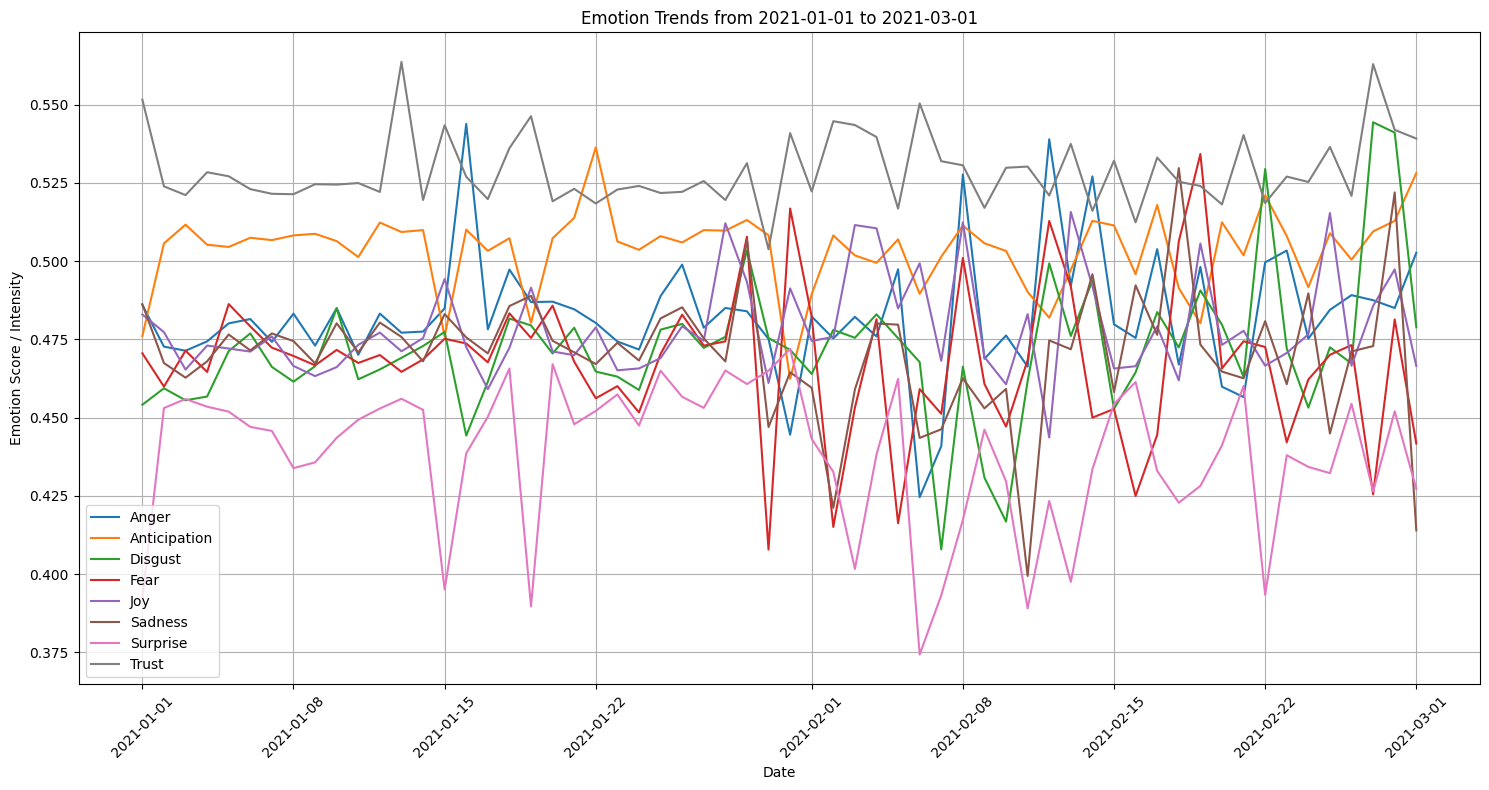

In [12]:
fig_1 = explore.plot_emotion_trends(emotions, "2021-01-01", "2021-03-01")

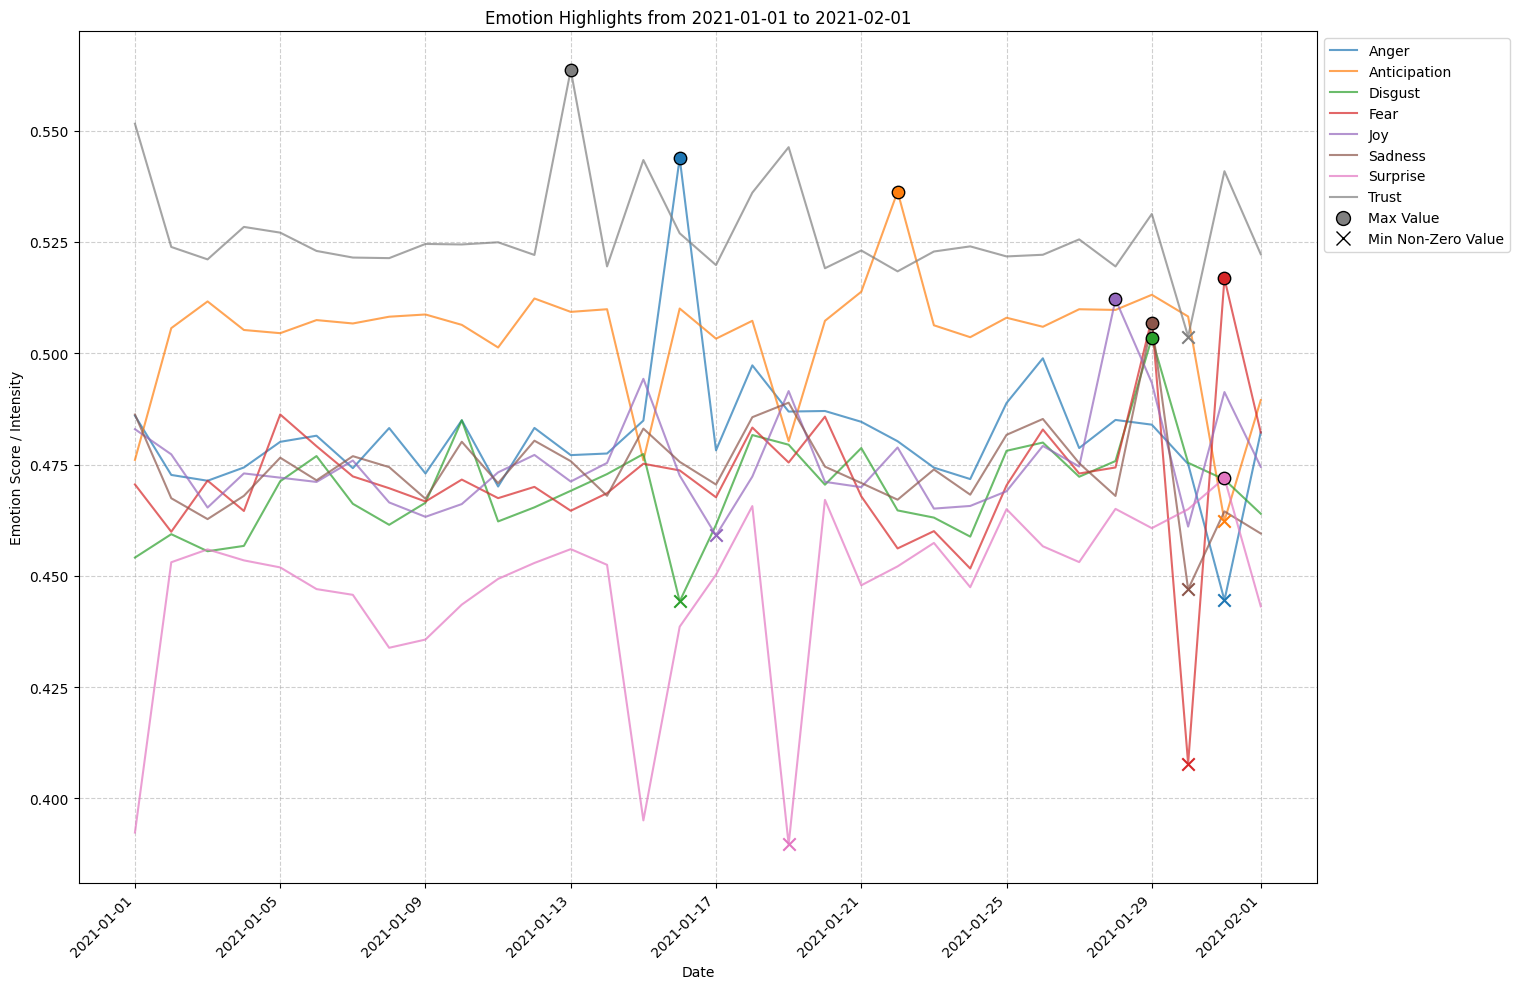

In [13]:
fig_2 = explore.plot_emotion_highlights(emotions, "2021-01-01", "2021-02-01")

---
# Topic Analysis

This section applies the exploration functions to a dataset of topics derived from the LDA (Latent Dirichlet Allocation) method.

### About the Topic Data

The topic data is **day-binned**: each row represents a topic cluster for a specific day and subreddit. The columns are:

- `date`: The day the topic cluster was recorded (e.g., `2021-01-01`)
- `topic_id`: The index number of the topic cluster
- `topic_name`: The auto-assigned name of the topic cluster (typically the first three words from the top words list)
- `top_words`: The top 10 most frequent words in the topic cluster
- `subreddit_id`: The subreddit ID from which the topic cluster is drawn (used to identify which subreddit the topic is associated with)
- `doc_count`: The number of documents (comments) in the cluster
- `sample_docs`: A list of 20 comment IDs that are in the topic cluster

Note: The dataset contains the **top 20 topic clusters per day across all subreddits**. The `subreddit_id` field indicates which subreddit each topic cluster is associated with.

### What Topic Clusters Represent

Topic clusters group together Reddit comments that discuss similar subjects, as identified by the LDA algorithm. Each cluster is defined by its most frequent words, giving you a sense of the main themes or topics being discussed in a subreddit on a given day.

### Interpreting Results

- **Top topics per day**: Shows which topics were most prominent across subreddits on a specific day, based on document count.
- **Top words**: Use the top words to understand the main subject or theme of each topic cluster.
- **Topic name**: Provides a quick summary of the topic, usually based on the most representative words.
- **Subreddit ID**: Lets you see which subreddit the topic cluster is drawn from.
- **Sample docs**: Lets you examine example comments from the cluster for deeper context.

Look for:
- High document counts to identify major discussion themes
- Changes in top topics over time to spot shifts in community focus
- The top words and sample docs to understand the nature of each topic

This analysis helps you explore what Reddit users are talking about, how topics evolve, and which subjects dominate discussions in different subreddits and time periods.

In [14]:
topics_csv_path = explore.get_data(
    "https://data.ldaca.edu.au/api/object/arcp%3A%2F%2Fname%2Chdl10.25912~RDF_1754373503052%2Ftopics_crate%2F/topics_crate%2Ftopics_2011_2025.csv",
    "topics_2011_2025.csv"
)


topics = explore.load_data(topics_csv_path)

In [15]:
top_topics = explore.top_topics_per_day_in_date_range(topics, 10, "2021-01-01", "2021-03-01")

In [16]:
keyword_search_topics = explore.search_keyword_in_topics_by_date(topics, "national", "2021-01-01", "2021-03-01")

In [17]:
top_subreddits=explore.top_subreddits_for_keyword_by_date(topics, "national", 10 , "2021-01-01", "2021-03-01")